<a href="https://colab.research.google.com/github/anshuldeoli/EDA_Project_Team_Notebook/blob/main/Play_Store_App_Review_Analysis_Self_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

###**The goal of this project is to provide data that will assist the developers to understand client needs and, as a result, popularise the product. It is a collection of 10K+ Google Play Store apps for studying the Android market. This bundle of data includes information about several applications as well as user feedback.**
 
  *  There are two data sets used in this project.
  1.  **Play Store data** which is our main dataset.
  2.  **User reviews data** which contains reviews (Positive, Negative, Neutral) for each app.

#**Importing Data & Modules**

In [51]:
#Importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [52]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Loading CSV Files
file_path = '/content/drive/MyDrive/Colab Notebooks/Self Project/Copy of Play Store Data.csv'
df=pd.read_csv(file_path)

In [54]:
# Printing first five rows of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
df.shape

(10841, 13)

**There are 10841 rows and 13 coulmns in our dataset**

# **Data Cleaning (Playstore Data)**

In [56]:
# Checking data types of features present in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [57]:
#Created copy of our dataset
df_new = df.copy()

In [58]:
# Cheking for how many null values present in our DataFrame
df_new.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**From above we can see in our dataset 'Rating' coulmn has 1474 null values which is maximum as compare to other columns.**

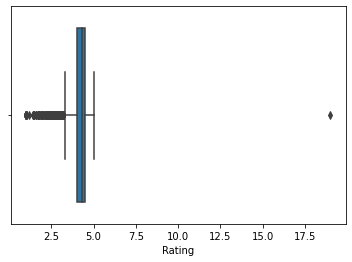

In [59]:
# Boxplot to see whether any outlier present in rating column or not
sns.boxplot(x=df_new['Rating'])

**From above boxplot we can see there is an outlier present in 'Rating' coulmn**

In [60]:
# Finding outlire present in Rating column because Rating should not to be more than 5.0.
df_new[df_new.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [61]:
# To Drop the outlier 
df_new.drop([10472],inplace=True)

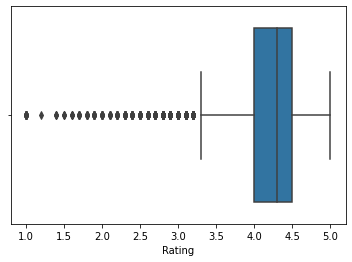

In [62]:
# Boxplot to check whether the outlier is removed or not 
sns.boxplot(x=df_new['Rating'])

In [63]:
# Filling all null values present in 'Rating' coulmn with the median.
median_value= df_new['Rating'].median()
df_new['Rating'].fillna(value=median_value, inplace=True)

In [64]:
df_new['Rating'].isnull().sum()

0

**Now we can see there is no null value present in the 'Rating' column.**

In [65]:
#Converted 'Reviews' data type from object (which included junk) to float. 
df_new['Reviews'] = pd.to_numeric(df_new['Reviews'],errors='coerce').convert_dtypes()

In [66]:
df_new['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: Int64

**From above we can see that the data type of Reviews is changed from object to Int64.**

In [67]:
# Replacing multiple string i.e '+' and ',' present in 'Price' column.
df_new['Price'] = df_new['Price'].str.replace('$','').replace('Everyone','0.0').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [68]:
df_new['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

**Now there is no string present in the price column.**

In [69]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  Int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: Int64(1), float64(2), object(10)
memory usage: 1.2+ MB


**From above we can see that the data type of Price is changed from object to float64**